# Homework 10.10.2023

> получить распределение кол-ва купленных товаров в одном заказе рамках одного клиента

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

sns.set_style("darkgrid")
%matplotlib inline

In [3]:
df = pd.read_csv("Data_hw10_10.csv")

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.dropna(inplace=True)

In [6]:
df["Customer ID"] = df["Customer ID"].astype(int)

In [57]:
def get_df(df, customer_id: int, invoice: str):
    cur_df = df[(df["Customer ID"] == customer_id) & (df["Invoice"] == invoice) & (df["Quantity"] > 0)]
    return cur_df.groupby(["StockCode"])["Quantity"].sum()

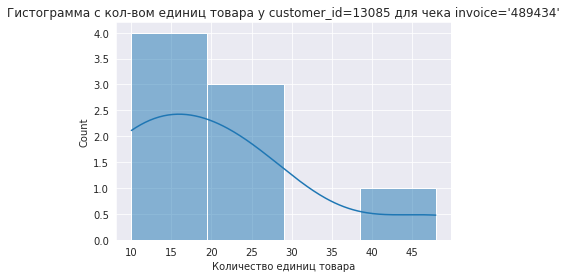

In [58]:
def create_hist(df, customer_id: int, invoice: str):
    cur_df = get_df(df, customer_id, invoice)
    sns.histplot(cur_df, kde=True)
    plt.title(f"Гистограмма с кол-вом единиц товара у {customer_id=} для чека {invoice=}")
    plt.xlabel("Количество единиц товара")
    plt.show()
    
create_hist(df, 13085, "489434")

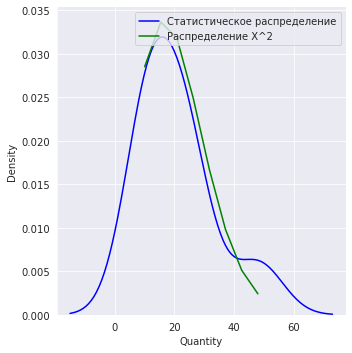

In [156]:
def create_dis(df, customer_id: int, invoice: str):
    cur_df = get_df(df, customer_id, invoice)
    sns.displot(cur_df, kind="kde", color="blue", label="Статистическое распределение")
    x = np.linspace(cur_df.min(), cur_df.max(), len(cur_df))
    plt.plot(x, scipy.stats.chi2.pdf(x, df=50, loc=-41, scale=1.2), color = 'green', label='Распределение X^2')
    plt.legend(loc="upper right")
    plt.show()

    
create_dis(df, 13085, "489434")